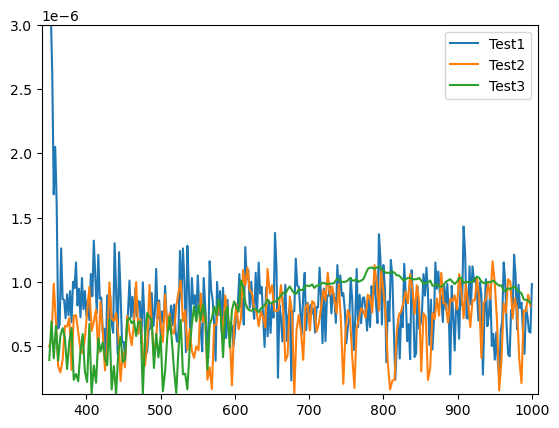

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def determine_delim(path):
    # Common delimiters to check
    delimiters = [',', '\t', ';', ' ']
    delimiter_counts = {delimiter: 0 for delimiter in delimiters}
    
    try:
        with open(path, 'r') as file:
            # Read the first 1000 characters to get a sample of the file content
            sample = file.read(1000)
            
            # Count occurrences of each delimiter in the sample
            for delimiter in delimiters:
                delimiter_counts[delimiter] = sample.count(delimiter)
                
            # Determine the most likely delimiter by finding the max count
            likely_delimiter = max(delimiter_counts, key=delimiter_counts.get)
            
            # Check if there was at least one occurrence of the delimiter
            if delimiter_counts[likely_delimiter] > 0:
                return likely_delimiter
            else:
                return "Unknown delimiter"
    except Exception as e:
        print(f"Error processing file: {e}")
        return None

paths = '''
/Users/josuehernandez/Downloads/Calibration_data/1_st_calibration_000.txt
/Users/josuehernandez/Downloads/Calibration_data/2_st_calibration_000.txt
/Users/josuehernandez/Downloads/Calibration_data/3_st_calibration_000.txt
'''.split()

sampID = '''
1
2
3
'''.split()

sample_name = 'Test'

for j in np.arange(len(paths)):
    #File paths of absorbance and PL data
    path = paths[j]

    # Figure Save Location
    savePath = '/Users/josuehernandez/Downloads/Calibration_data/' + sample_name
    
    # Extracting abs and pl imformation
    absData = pd.read_csv(path, delimiter='\t', names=('wavelength', 'intensity'))
    
    ########################################################### Abs Data ###########################################################
    abs_x = absData.wavelength
    abs_y = absData.intensity
    ########################################################### Plots ##############################################################
    # Plot
    plt.plot(abs_x, abs_y, label=sample_name + sampID[j])
    plt.xlim([min(abs_x)-10, max(abs_x)+10])
    plt.ylim([min(abs_y), 3*10**-6])
    plt.legend()
    plt.savefig(savePath, dpi=1200)
plt.show()
